# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Akhdan Hanif Kartika Zaman
- **Email:** Akhdanzaman@gmail.com
- **ID Dicoding:** akhdanzaman

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pengaruh suhu terhadap jumlah peminjam sepeda?
- Pertanyaan 2 : Pada jam berapa jumlah peminjam banyak berdatangan?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

c:\Users\acer\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Wrangling

### Gathering Data

In [2]:
# Import dataset berdasarkan hari
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Import dataset yang mencantumkan jam
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Informasi datatype kolom dari dataset day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# Informasi datatype kolom dari dataset hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Kedua dataframe, pada kolom dteday memiliki datatype yang salah

In [6]:
# Mencari baris yang kosong
print(hour_df.isna().sum())
print("====")
print(day_df.isna().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
====
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [7]:
# Mencari duplikasi
print("Duplikasi data: ", hour_df.duplicated().sum())
print("Duplikasi data: ", day_df.duplicated().sum())

Duplikasi data:  0
Duplikasi data:  0


In [8]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour_df.groupby('dteday')['cnt'].sum()


dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
2011-01-04    1562
2011-01-05    1600
              ... 
2012-12-27    2114
2012-12-28    3095
2012-12-29    1341
2012-12-30    1796
2012-12-31    2729
Name: cnt, Length: 731, dtype: int64

In [11]:
# Mencari nilai unik
hour_df.apply(lambda x:(x.unique()))

instant       [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dteday        [2011-01-01, 2011-01-02, 2011-01-03, 2011-01-0...
season                                             [1, 2, 3, 4]
yr                                                       [0, 1]
mnth                    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
hr            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
holiday                                                  [0, 1]
weekday                                   [6, 0, 1, 2, 3, 4, 5]
workingday                                               [0, 1]
weathersit                                         [1, 2, 3, 4]
temp          [0.24, 0.22, 0.2, 0.32, 0.38, 0.36, 0.42, 0.46...
atemp         [0.2879, 0.2727, 0.2576, 0.3485, 0.3939, 0.333...
hum           [0.81, 0.8, 0.75, 0.86, 0.76, 0.77, 0.72, 0.82...
windspeed     [0.0, 0.0896, 0.2537, 0.2836, 0.2985, 0.194, 0...
casual        [3, 8, 5, 0, 2, 1, 12, 26, 29, 47, 35, 40, 41,...
registered    [13, 32, 27, 10, 1, 0, 2, 

### Cleaning Data

In [12]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [13]:
hour_df.describe(include="all")

C:\Users\acer\AppData\Local\Temp\ipykernel_6876\1264340832.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [14]:
hour_df.groupby('season')['cnt'].sum()


season
1     471348
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [15]:
hour_df.groupby('hr')['cnt'].sum()

hr
0      39130
1      24164
2      16352
3       8174
4       4428
5      14261
6      55132
7     154171
8     261001
9     159438
10    126257
11    151320
12    184414
13    184919
14    175652
15    183149
16    227748
17    336860
18    309772
19    226789
20    164550
21    125445
22     95612
23     63941
Name: cnt, dtype: int64

In [16]:
hour_df.groupby('weekday')['cnt'].sum()

weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64

In [17]:
corr = hour_df.drop(columns=['registered','casual','instant','yr']).corr()['cnt'].sort_values(ascending=False)

# Create a bar plot
fig = px.bar(corr , color=corr.values)
fig.show()

## Visualization & Explanatory Analysis




### Pertanyaan 1: Pada temperatur dan cuaca yang bagaimana penyewa akan banyak berdatangan?

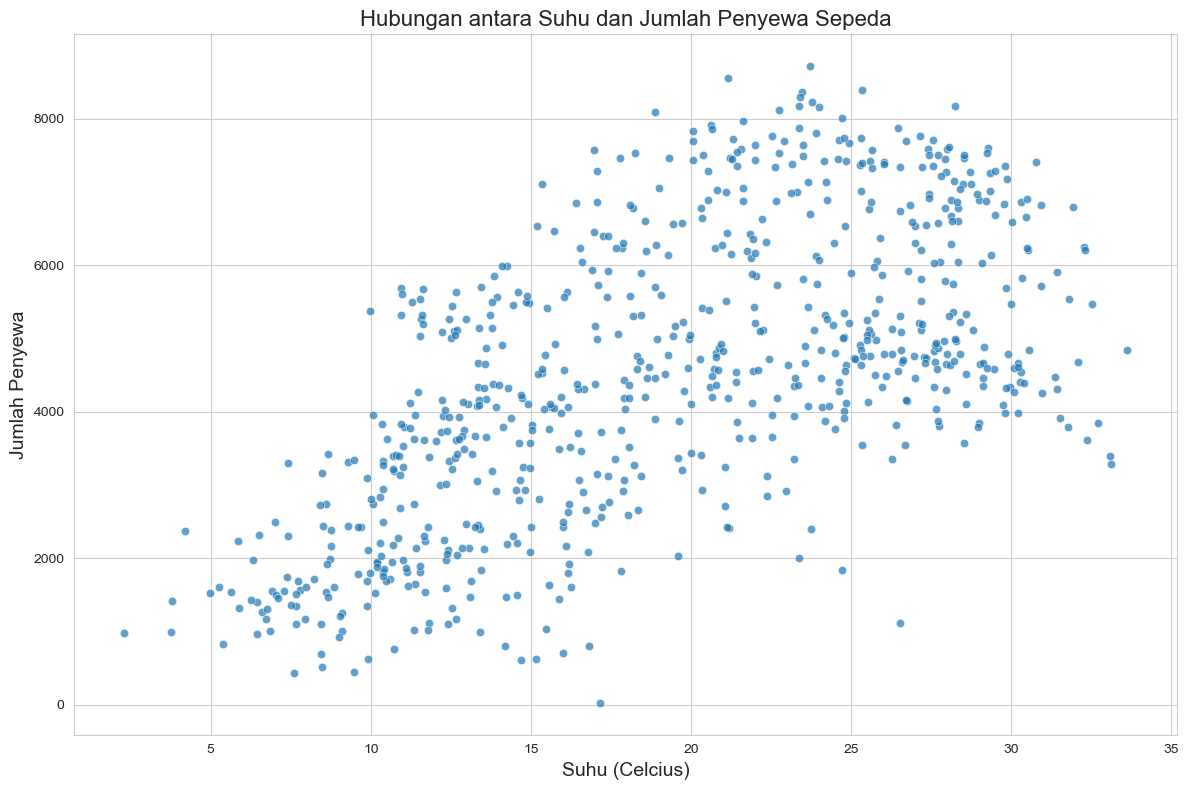

In [18]:

# Mengatur gaya plot
sns.set_style("whitegrid")

# Membuat plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x=day_df['temp']*((39+8)-8), y='cnt' ,data=day_df, palette='viridis', alpha=0.7)

# Menambahkan judul dan label sumbu
plt.title('Hubungan antara Suhu dan Jumlah Penyewa Sepeda', fontsize=16)
plt.xlabel('Suhu (Celcius)', fontsize=14)
plt.ylabel('Jumlah Penyewa', fontsize=14)

# Menampilkan plot
plt.tight_layout()
plt.show()


Penyewa dominan akan menyewa sepeda pada suhu 20 hingga 30 derajat Celcius

### Pertanyaan 2: Pada jam berapa yang paling banyak pelanggan?

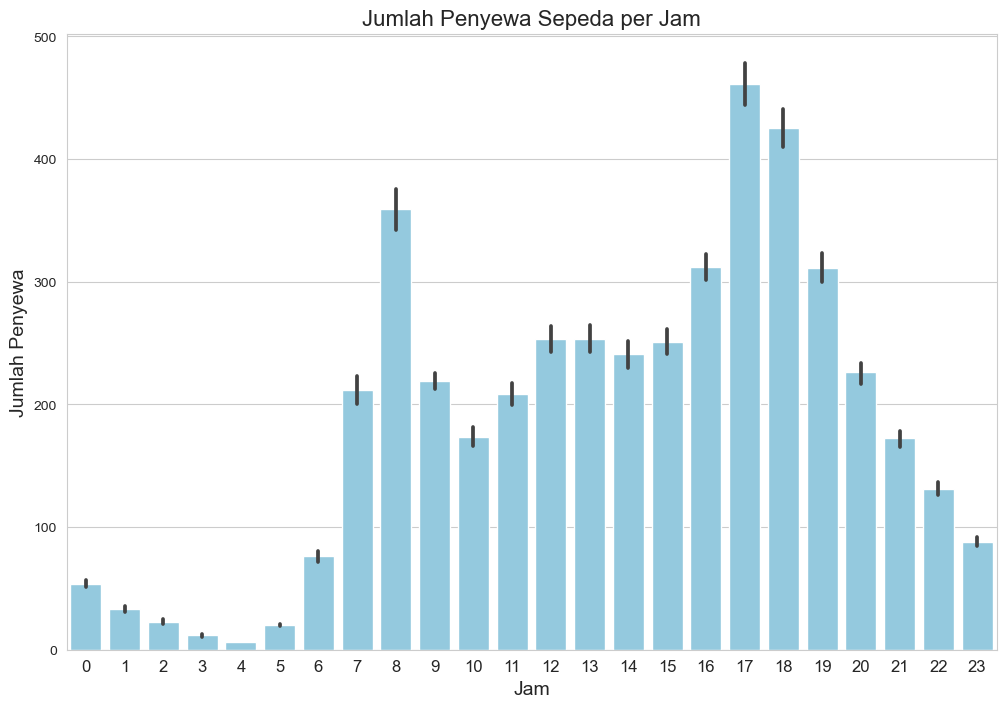

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya plot
sns.set_style("whitegrid")

# Membuat plot
plt.figure(figsize=(12, 8))
sns.barplot(y="cnt", x="hr", data=hour_df, color="skyblue")

# Menambahkan judul dan label sumbu
plt.title('Jumlah Penyewa Sepeda per Jam', fontsize=16)
plt.xlabel('Jam', fontsize=14)
plt.ylabel('Jumlah Penyewa', fontsize=14)

# Mengatur ukuran label sumbu x
plt.tick_params(axis='x', labelsize=12)

# Menampilkan plot
plt.show()


Penyewa banyak berdatangan ketika pagi hari pukul 8 dan sore hari pukul 5

## Conclusion

- Pengelola bike sharing dapat mempertimbangkan prakiraan cuaca untuk mengantisipasi kelonjakan atau defisit penyewa.
- Pengelola Bike Sharing dapat memfokuskan advertising untuk mendorong persewaan di jam-jam selain peak hour, yaitu jam 8 pagi dan 5 sore.

In [20]:
all_df = pd.merge(hour_df, )
all_df.to_csv("all_data.csv", index=False)

NameError: name 'all_df' is not defined